<a href="https://colab.research.google.com/github/tayanarapaiva/PIM/blob/main/ATv_bolas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage.filters import (threshold_otsu, threshold_triangle, threshold_niblack, threshold_sauvola)
from skimage import img_as_ubyte
from skimage.filters import threshold_otsu


In [197]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


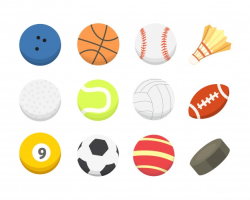

In [198]:

img1 = cv2.imread('/content/drive/MyDrive/DISCIPLINAS/IMAGENS_MÉDICAS/bolas_.jpeg')

img1 = cv2.resize(img1, (int(img1.shape[1]*0.4),int(img1.shape[0]*0.4)), interpolation = cv2.INTER_AREA)


def show_images(images, titles=None, cols=2):
    rows = (len(images) + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(10,10))
    axs = axs.flat
    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].axis('off')
        if titles is not None:
            axs[i].set_title(titles[i])
    plt.show()


img_1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

cv2_imshow(img1)


#IMAGEM 01


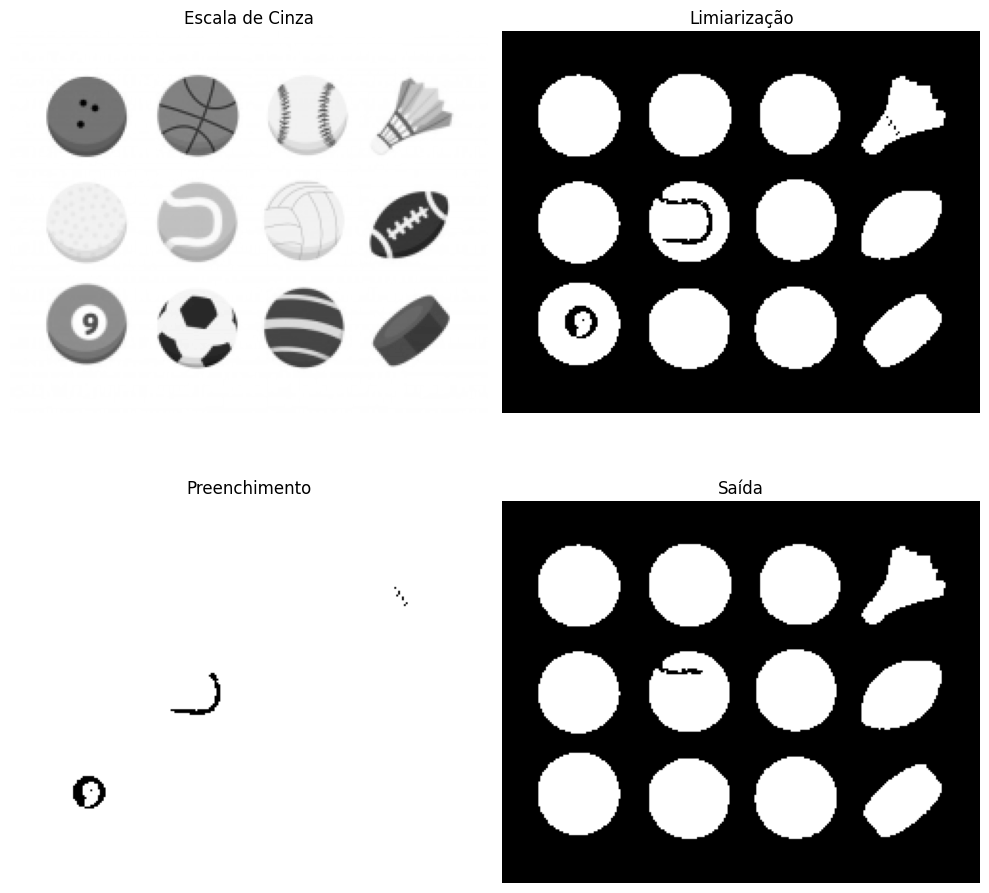

In [199]:
# Converter a imagem para escala de cinza
img_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

# Limiarização
limiar, img_limiarizada = cv2.threshold(img_gray, 248, 255, cv2.THRESH_BINARY_INV)

# Criar uma cópia da imagem limiarizada
img_preenchimento = img_limiarizada.copy()

# Máscara usada para preenchimento por inundação
# Aviso: o tamanho precisa ter 2 pixels a mais do que a imagem
h, w = img_limiarizada.shape[:2]
mascara = np.zeros((h + 2, w + 2), np.uint8)

# Preenchimento por floodfilled a partir do ponto (0, 0)
cv2.floodFill(img_preenchimento, mascara, (0, 0), 255)

# Inverter a imagem preenchida por floodfilled
img_preenchimento_invertida = cv2.bitwise_not(img_preenchimento)

# Combinar as duas imagens para obter o objeto em primeiro plano
img_saida = img_limiarizada | img_preenchimento_invertida

img_res = cv2.cvtColor(img_saida, cv2.COLOR_BGR2RGB)
# Configurar a exibição das imagens em uma tabela
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Exibir a imagem em escala de cinza
axs[0, 0].imshow(img_gray, cmap='gray')
axs[0, 0].set_title('Escala de Cinza')

# Exibir a imagem limiarizada
axs[0, 1].imshow(img_limiarizada, cmap='gray')
axs[0, 1].set_title('Limiarização')

# Exibir a imagem do preenchimento por inundação
axs[1, 0].imshow(img_preenchimento, cmap='gray')
axs[1, 0].set_title('Preenchimento')

# Exibir a imagem de saída combinada
axs[1, 1].imshow(img_res, cmap='gray')
axs[1, 1].set_title('Saída')

# Remover as marcações dos eixos
for ax in axs.flat:
    ax.axis('off')

# Ajustar o espaçamento entre as subplots
plt.tight_layout()

# Exibir a tabela de imagens
plt.show()

#cv2_imshow(np.vstack([np.hstack([img_limiarizada, img_preenchimento]), np.hstack([img_preenchimento_invertida, img_saida])]))

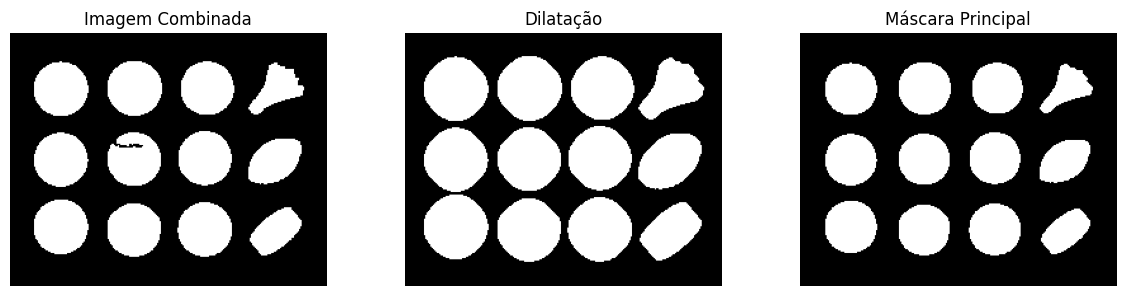

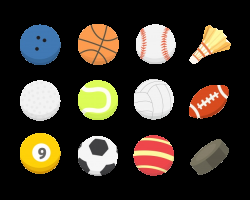

In [200]:


# Definindo o kernel do fechamento
kernel_plus = np.uint8([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]])

# Realizando o fechamento da máscara
img_dil = cv2.dilate(img_saida, kernel_plus, iterations=4)
img_ero = cv2.erode(img_dil, kernel_plus, iterations=5)
main_mask_2 = img_ero

# Exibindo as imagens em uma única linha
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Exibindo a imagem de saída combinada
axs[0].imshow(img_saida, cmap='gray')
axs[0].set_title('Imagem Combinada')

# Exibindo a imagem após o processo de dilatação
axs[1].imshow(img_dil, cmap='gray')
axs[1].set_title('Dilatação')

# Exibindo a máscara principal após o processo de erosão
axs[2].imshow(main_mask_2, cmap='gray')
axs[2].set_title('Máscara Principal')





# Removendo as marcações dos eixos
for ax in axs:
    ax.axis('off')

# Ajustando o espaçamento entre as subplots
plt.tight_layout()

# Exibindo as imagens
plt.show()

# Testando a máscara na imagem original
img_out_res = cv2.bitwise_and(img_1, img_1, mask=main_mask_2)
img_res3 = cv2.cvtColor(img_out_res, cv2.COLOR_BGR2RGB)

# Exibindo a imagem resultante
cv2_imshow(img_res3)


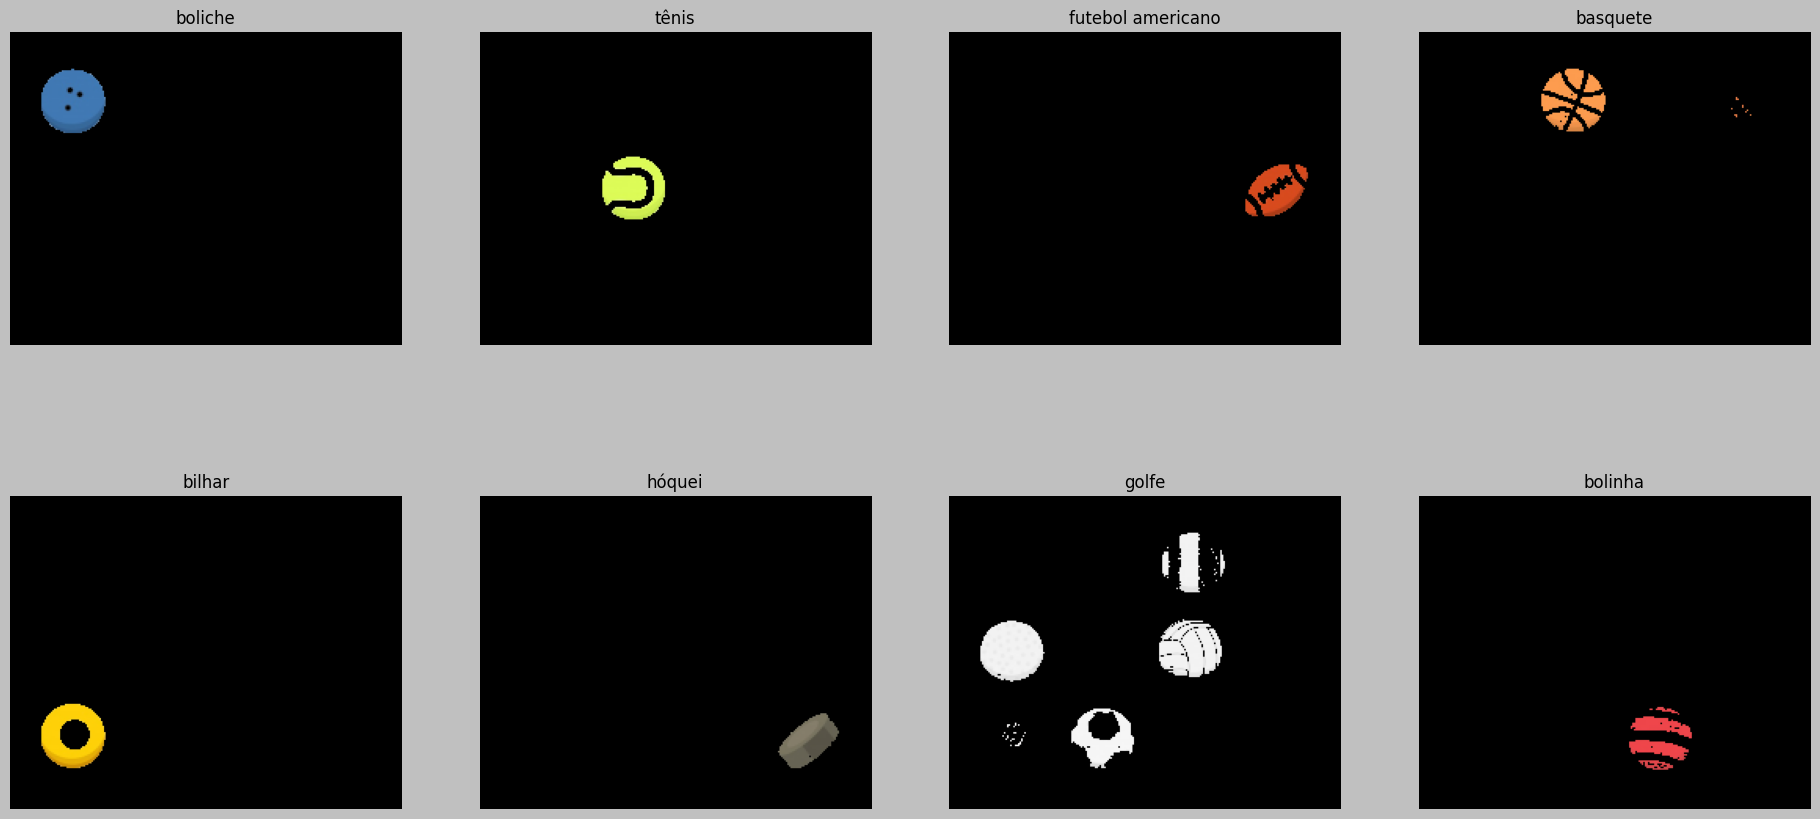

In [201]:
# Defina os limiares para cada cor
limiares_cores = {
    "boliche": ([95, 70, 50], [125, 255, 255]),
    "tênis": ([28, 100, 200], [95, 255, 255]),
    "futebol americano": ([6, 182, 0], [8, 255, 255]),
    "basquete": ([10, 170, 150], [15, 180, 255]),
    "bilhar": ([20, 180, 0], [27, 255, 255]),
    "hóquei": ([20, 40, 80], [40, 65, 140]),
    "golfe": ([0, 0, 220], [3, 3, 255]),
    "bolinha": ([175, 165, 200], [179, 185, 245])
}

# Converter a imagem para o espaço de cores HSV
hsv_img_2 = cv2.cvtColor(img_res3, cv2.COLOR_BGR2HSV)

# Criar a figura para exibir as imagens
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.patch.set_facecolor('silver')

# Iterar sobre cada cor e plotar a imagem correspondente
row = 0
col = 0
for cor, (lower, upper) in limiares_cores.items():
    mask = cv2.inRange(hsv_img_2, np.array(lower), np.array(upper))
    img_colorida = cv2.bitwise_and(img_res3, img_res3, mask=mask)
    axs[row, col].imshow(cv2.cvtColor(img_colorida, cv2.COLOR_BGR2RGB))
    axs[row, col].set_title(cor)
    axs[row, col].axis('off')
    col += 1
    if col == 4:
        col = 0
        row += 1

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.9, wspace=0.2, hspace=0.2)
plt.show()


<ipython-input-202-15b34853b4db>:103: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 3, pos)


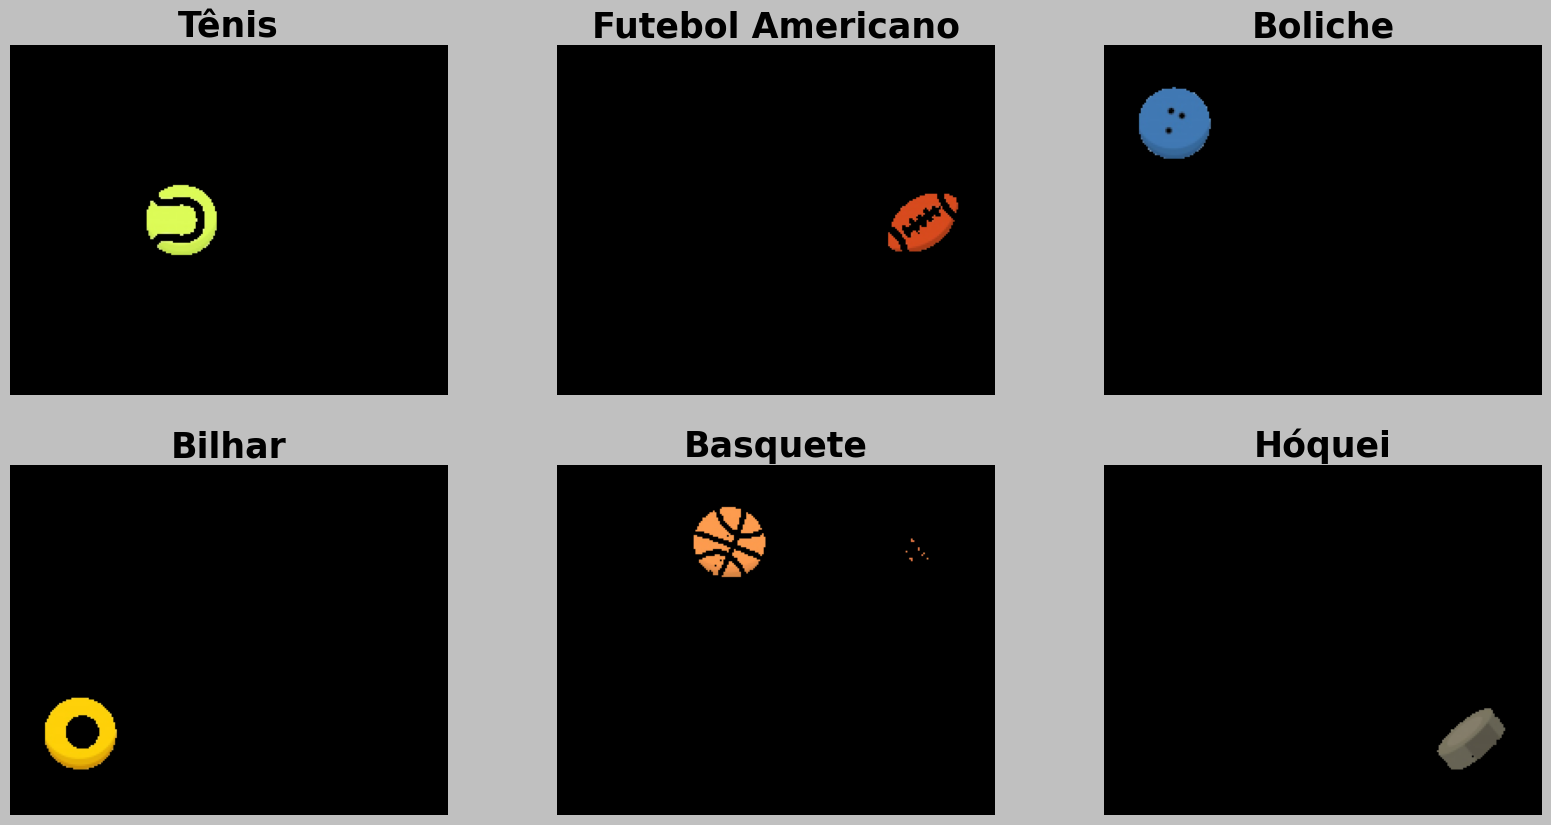

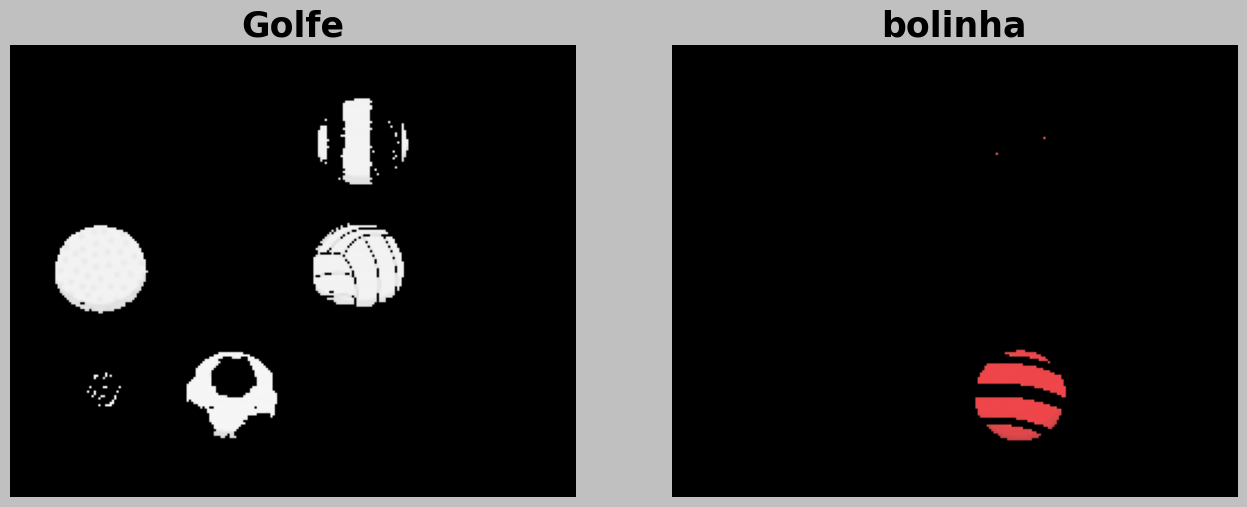

In [202]:


# Defina os limiares para cada cor
limiares_cores = {
    "boliche": ([95, 70, 50], [125, 255, 255]),
    "tênis": ([28, 100, 200], [95, 255, 255]),
    "futebol americano": ([6, 182, 0], [8, 255, 255]),
    "basquete": ([10, 170, 150], [15, 180, 255]),
    "bilhar": ([20, 180, 0], [27, 255, 255]),
    "hóquei": ([20, 40, 80], [40, 65, 140]),
    "golfe": ([0, 0, 220], [3, 3, 255]),
    "bolinha": ([175, 165, 200], [179, 185, 245])
}

# Converter a imagem para o espaço de cores HSV
hsv_img_2 = cv2.cvtColor(img_res3, cv2.COLOR_BGR2HSV)

# Definir kernel para operações morfológicas
kernel_plus = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Elaborando máscaras a partir da separação por cores
def gerar_mascara(imagem_cor, erode_iter, dilate_iter):
    imagem_bin = cv2.cvtColor(imagem_cor, cv2.COLOR_BGR2GRAY)
    _, imagem_bin = cv2.threshold(imagem_bin, 0, 255, cv2.THRESH_BINARY)
    imagem_erode = cv2.erode(imagem_bin, kernel_plus, iterations=erode_iter)
    imagem_dilate = cv2.dilate(imagem_erode, kernel_plus, iterations=dilate_iter)
    return imagem_dilate

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.patch.set_facecolor('silver')

# Iterar sobre cada cor e plotar a imagem correspondente
for i, (cor, (lower, upper)) in enumerate(limiares_cores.items()):
    mask = cv2.inRange(hsv_img_2, np.array(lower), np.array(upper))
    img_colorida = cv2.bitwise_and(img_res3, img_res3, mask=mask)
    axs[i // 4, i % 4].imshow(cv2.cvtColor(img_colorida, cv2.COLOR_BGR2RGB))
    axs[i // 4, i % 4].set_title(cor)
    axs[i // 4, i % 4].axis('off')


#Conversão para HSI
hsv_img_2 = cv2.cvtColor(img_res3, cv2.COLOR_BGR2HSV)

#Limiares para imagem 2
#boliche
lower_blue_2 = np.array([95,70,50])
upper_blue_2 = np.array([125,255,255])
#tenis
lower_green_2 = np.array([28,100,200])
upper_green_2 = np.array([95,255,255])
#americano
lower_orange_2 = np.array([6,182,0])
upper_orange_2 = np.array([8,255,255])
#basquete
lower_orange_2_2 = np.array([10,170,150])
upper_orange_2_2 = np.array([15,180,255])
#sinuca
lower_yellow_2 = np.array([20,180,0])
upper_yellow_2 = np.array([27,255,255])
#hoquei
lower_grey_2 = np.array([20,40,80])
upper_grey_2 = np.array([40,65,140])
#vbolinha
lower_red1 = np.array([175,165,200])
upper_red1 = np.array([179,185,245])
lower_red2 = np.array([0,165,200])
upper_red2 = np.array([5,185,245])
lower_yellow_2_sl = np.array([25,90,250])
upper_yellow_2_sl = np.array([35,100,255])
#golfe
lower_white_2 = np.array([0,0,220])
upper_white_2 = np.array([3,3,255])



#Máscaras da imagem 2
img_2_mask_red1 = cv2.inRange(hsv_img_2, lower_red1, upper_red1)
img_2_mask_red2 = cv2.inRange(hsv_img_2, lower_red2, upper_red2)
img_2_mask_y_sl = cv2.inRange(hsv_img_2, lower_yellow_2_sl, upper_yellow_2_sl)
img_2_mask_red = img_2_mask_red1 + img_2_mask_red2 #+ img_2_mask_y_sl
img_2_mask_fut_am = cv2.inRange(hsv_img_2, lower_orange_2, upper_orange_2)
img_2_mask_bol = cv2.inRange(hsv_img_2, lower_blue_2, upper_blue_2)
img_2_mask_tenis = cv2.inRange(hsv_img_2, lower_green_2, upper_green_2)
img_2_mask_bil = cv2.inRange(hsv_img_2, lower_yellow_2, upper_yellow_2)
img_2_mask_basq = cv2.inRange(hsv_img_2, lower_orange_2_2, upper_orange_2_2)
img_2_mask_hoq = cv2.inRange(hsv_img_2, lower_grey_2, upper_grey_2)
img_2_mask_gol = cv2.inRange(hsv_img_2, lower_white_2, upper_white_2)

#Imagens separadas por cor
img_2_seila = cv2.bitwise_and(img_res3,img_res3, mask= img_2_mask_red)
img_2_tenis = cv2.bitwise_and(img_res3,img_res3, mask= img_2_mask_tenis)
img_2_fut_am = cv2.bitwise_and(img_res3,img_res3, mask= img_2_mask_fut_am)
img_2_bol = cv2.bitwise_and(img_res3,img_res3, mask= img_2_mask_bol)
img_2_bil = cv2.bitwise_and(img_res3,img_res3, mask= img_2_mask_bil)
img_2_basq = cv2.bitwise_and(img_res3,img_res3, mask= img_2_mask_basq)
img_2_hoq = cv2.bitwise_and(img_res3,img_res3, mask= img_2_mask_hoq)
img_2_gol = cv2.bitwise_and(img_res3,img_res3, mask= img_2_mask_gol)


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""
     # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title,fontsize=25,fontweight='bold')
    plt.axis('off')

# Plot all the images:
show_img_with_matplotlib(img_2_tenis, "Tênis", 1)
show_img_with_matplotlib(img_2_fut_am, "Futebol Americano", 2)
show_img_with_matplotlib(img_2_bol, "Boliche", 3)
show_img_with_matplotlib(img_2_bil, "Bilhar", 4)
show_img_with_matplotlib(img_2_basq, "Basquete", 5)
show_img_with_matplotlib(img_2_hoq, "Hóquei", 6)


fig2 = plt.figure(figsize=(20, 10))
plt.suptitle("", fontsize=30, fontweight='bold')
fig2.patch.set_facecolor('silver')
#show_img_with_matplotlib(img_2_tenis, "Baseball", 1)
show_img_with_matplotlib(img_2_gol, "Golfe", 2)
#show_img_with_matplotlib(img_2_bol, "Vôlei", 3)
#show_img_with_matplotlib(img_2_bil, "Futebol", 4)
show_img_with_matplotlib(img_2_seila, "bolinha", 3)
#show_img_with_matplotlib(img_2_bil, "Peteca", 6)






plt.tight_layout()
plt.show()


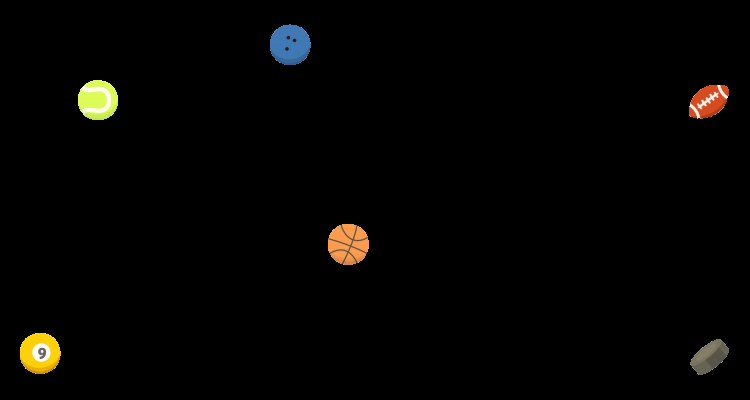

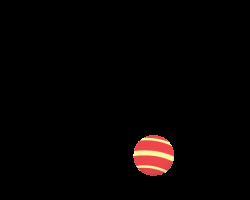

In [203]:
#Elaborando máscaras a partir da separação por cores

#Tênis
_, im_tenis_bin = cv2.threshold(cv2.cvtColor(img_2_tenis, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_ero_tenis_1 = cv2.erode(im_tenis_bin, kernel_plus, iterations = 2)
img_dil_tenis = cv2.dilate(img_ero_tenis_1, kernel_plus, iterations = 10)
mask_tenis_2 = img_dil_tenis
#imgsArray_2 = np.hstack([im_tenis_bin, img_dil_tenis, mask_tenis_2])
#cv2_imshow(imgsArray_2)
img_out_tenis = cv2.bitwise_and(img_res3, img_res3, mask= mask_tenis_2)

#Boliche
_, im_bol_bin = cv2.threshold(cv2.cvtColor(img_2_bol, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_ero_bol_1 = cv2.erode(im_bol_bin, kernel_plus, iterations = 2)
img_dil_bol = cv2.dilate(img_ero_bol_1, kernel_plus, iterations = 9)
mask_bol_2 = img_dil_bol
img_out_bol = cv2.bitwise_and(img_res3, img_res3, mask= mask_bol_2)

#Futebol Americano
_, im_fut_bin = cv2.threshold(cv2.cvtColor(img_2_fut_am, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_ero_fut_1 = cv2.erode(im_fut_bin, kernel_plus, iterations = 2)
img_dil_fut = cv2.dilate(img_ero_fut_1, kernel_plus, iterations = 10)
mask_fut_2 = img_dil_fut
img_out_fut = cv2.bitwise_and(img_res3, img_res3, mask= mask_fut_2)

#Bilhar
_, im_bil_bin = cv2.threshold(cv2.cvtColor(img_2_bil, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_ero_bil_1 = cv2.erode(im_bil_bin, kernel_plus, iterations = 2)
img_dil_bil = cv2.dilate(img_ero_bil_1, kernel_plus, iterations = 8)
mask_bil_2 = img_dil_bil
img_out_bil = cv2.bitwise_and(img_res3, img_res3, mask= mask_bil_2)

#Basquete
_, im_basq_bin = cv2.threshold(cv2.cvtColor(img_2_basq, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_ero_basq_1 = cv2.erode(im_basq_bin, kernel_plus, iterations = 1)
img_dil_basq = cv2.dilate(img_ero_basq_1, kernel_plus, iterations = 8)
mask_basq_2 = img_dil_basq
img_out_basq = cv2.bitwise_and(img_res3, img_res3, mask= mask_basq_2)

#Hóquei
_, im_hoq_bin = cv2.threshold(cv2.cvtColor(img_2_hoq, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_ero_hoq_1 = cv2.erode(im_hoq_bin, kernel_plus, iterations = 2)
img_dil_hoq = cv2.dilate(img_ero_hoq_1, kernel_plus, iterations = 4)
mask_hoq_2 = img_dil_hoq
img_out_hoq = cv2.bitwise_and(img_res3, img_res3, mask= mask_hoq_2)

#bolinha
_, im_sl_bin = cv2.threshold(cv2.cvtColor(img_2_seila, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY)
img_ero_sl_1 = cv2.erode(im_sl_bin, kernel_plus, iterations = 1)
img_dil_sl = cv2.dilate(img_ero_sl_1, kernel_plus, iterations = 8)
mask_sl_2 = img_dil_sl
img_out_sl = cv2.bitwise_and(img_res3, img_res3, mask= mask_sl_2)

cv2_imshow(np.vstack([np.hstack([img_out_tenis,img_out_bol, img_out_fut]),
                      np.hstack([img_out_bil, img_out_basq, img_out_hoq])]))
cv2_imshow(img_out_sl)

Dimensões da imagem:  (200, 250, 3)
Dimensões da máscara:  (212, 208, 3)


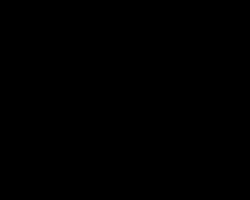

In [204]:
#Futebol
mask_sum = cv2.bitwise_not(mask_tenis_2 + mask_bol_2 + mask_fut_2 + mask_bil_2 + mask_basq_2 + mask_hoq_2 + mask_sl_2)

im_in_bgr = cv2.bitwise_and(img_res3, img_res3, mask= mask_sum)
im_in = cv2.cvtColor(im_in_bgr, cv2.COLOR_BGR2GRAY)

#cv2_imshow(im_in)

th, im_th_soc = cv2.threshold(im_in, 245, 250, cv2.THRESH_BINARY);
#cv2_imshow(im_th_soc)

img_soc_dil = cv2.dilate(im_th_soc, kernel_plus, iterations = 20)
#cv2_imshow(img_soc_dil)

img_soc_quase = cv2.bitwise_and(im_in_bgr, im_in_bgr, mask=img_soc_dil)
#cv2_imshow(img_soc_quase)

#Construção da máscara de círculos
mask_circ = np.zeros((int(img1.shape[0]),int(img1.shape[1])), dtype=np.uint8)
#cv2_imshow(mask_circ)

#Detecção de círculo para a bola

#Construção da máscara de círculos
img_blur1 = cv2.blur(img_soc_quase, (3,3))
mask_circ = np.zeros((int(img2.shape[0]),int(img2.shape[1])), dtype=np.uint8)
#cv2_imshow(mask_circ)

detected_circles = cv2.HoughCircles(cv2.cvtColor(img_blur1, cv2.COLOR_BGR2GRAY),
                   cv2.HOUGH_GRADIENT, 1, minDist = 50, param1 = 50,
                   param2 = 30, minRadius = 25, maxRadius = 250)
if detected_circles is not None:

    detected_circles = np.uint16(np.around(detected_circles))
    print(detected_circles.shape)

    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        cv2.circle(mask_circ, (a, b), r, (255, 255, 255), 2)


#máscara final para bola de futebol
h, w = mask_circ.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(mask_circ, mask, (0,0), 255);

# Invert floodfilled image
mask_soc_quase = cv2.bitwise_not(mask_circ)
mask_soc_ok = cv2.dilate(mask_soc_quase, kernel_plus, iterations=5)

# Verifique as dimensões da imagem e da máscara
print("Dimensões da imagem: ", img_soc_quase.shape)
print("Dimensões da máscara: ", mask_soc_ok_bgr.shape)

# Redimensione a máscara para corresponder às dimensões da imagem
mask_soc_ok_bgr_resized = cv2.resize(mask_soc_ok_bgr, (img_soc_quase.shape[1], img_soc_quase.shape[0]))

# Converta a imagem e a máscara para o tipo de dados float32
img_soc_quase_float32 = img_soc_quase.astype(np.float32)
mask_soc_ok_bgr_resized_float32 = mask_soc_ok_bgr_resized.astype(np.float32)

# Multiplique a imagem pela máscara elemento a elemento
img_soccer = img_soc_quase_float32 * (mask_soc_ok_bgr_resized_float32 / 255)

# Converta a imagem de volta para o tipo de dados uint8
img_soccer_uint8 = img_soccer.astype(np.uint8)

# Exiba a imagem resultante
cv2_imshow(img_soccer_uint8)


# ...


